<a href="https://colab.research.google.com/github/omkarmohite123/Task-_7/blob/main/Assignment_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#from google.colab import files
#uploaded=files.upload()

##KNN UNDERSTANDING THROUGH IMAGE


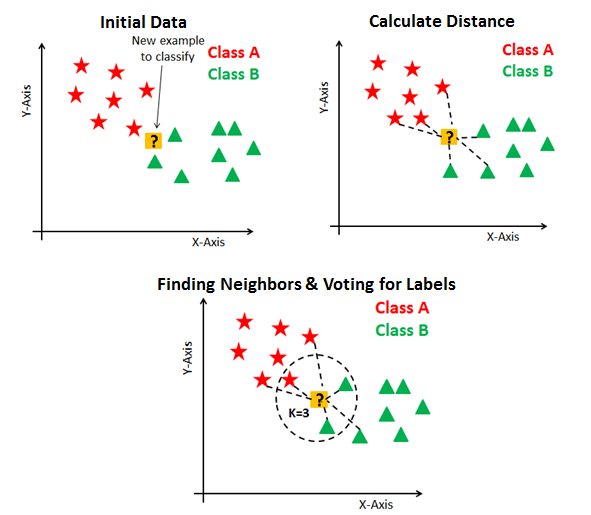

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from scipy.spatial import distance


In [ ]:
import pandas as pd
headerList = ['id', 'RI', 'Na','Mg','Al','Si','K','Ca','Ba','Fe','class attribute']

read_file = pd.read_csv (r'/content/trainKNN.txt')
read_file.to_csv (r'trainKNN.csv',header=headerList, index=None)


In [ ]:
url = '/content/trainKNN.csv'
df1 = pd.read_csv(url)


In [ ]:
df1=df1.drop('id',axis=1)

In [ ]:
df1.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,class attribute
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,1.518281,13.373846,2.750103,1.456154,72.639795,0.521744,8.911538,0.165077,0.050513,2.676923
std,0.003057,0.784929,1.390655,0.492293,0.763064,0.673624,1.425102,0.486304,0.086506,2.064234
min,1.511310,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516455,12.875000,2.335000,1.190000,72.330000,0.145000,8.220000,0.000000,0.000000,1.000000
50%,1.517630,13.270000,3.480000,1.360000,72.810000,0.560000,8.570000,0.000000,0.000000,2.000000
75%,1.518950,13.795000,3.605000,1.625000,73.080000,0.610000,9.105000,0.000000,0.090000,3.000000
max,1.533930,15.790000,3.980000,3.500000,75.180000,6.210000,16.190000,3.150000,0.340000,7.000000


In [ ]:
read_file = pd.read_csv (r'/content/testKNN.txt')
read_file.to_csv (r'testKNN.csv',header=headerList, index=None)


In [ ]:
url = '/content/testKNN.csv'
df2 = pd.read_csv(url)


In [ ]:
df2=df2.drop('id',axis=1)

In [ ]:
df2.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,class attribute
count,17.000000,17.000000,17.000000,17.00000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,1.518991,13.805294,1.769412,1.37000,72.849412,0.257647,9.437647,0.310000,0.128235,4.176471
std,0.002810,1.101659,1.744772,0.58676,0.910415,0.272799,1.419386,0.631951,0.169567,2.157409
min,1.511150,12.850000,0.000000,0.34000,71.360000,0.000000,6.650000,0.000000,0.000000,1.000000
25%,1.517110,13.000000,0.000000,0.90000,72.200000,0.000000,8.620000,0.000000,0.000000,2.000000
50%,1.519340,13.380000,1.610000,1.40000,72.720000,0.160000,8.990000,0.000000,0.000000,5.000000
75%,1.520650,14.230000,3.540000,1.94000,73.390000,0.560000,10.170000,0.150000,0.240000,6.000000
max,1.523000,17.380000,3.780000,2.17000,75.410000,0.760000,12.500000,1.670000,0.510000,7.000000


In [ ]:
def standardize (df):
    for col in df.columns:
        if col != "class attribute": # Don't standardize the categories
            df[col] = (df[col] - df[col].mean())/df[col].std()
    return df


In [ ]:
# Standardize data
train = standardize(df1)
test = standardize(df2)
train.head()


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,class attribute
0,-0.219548,0.65758,0.611149,-0.195318,0.118214,-0.061969,-0.758920,-0.339452,-0.583925,1
1,-0.687312,0.19894,0.575195,0.170317,0.458946,-0.195574,-0.794005,-0.339452,-0.583925,1
2,-0.203193,-0.20874,0.675867,-0.337510,-0.039046,0.071637,-0.485255,-0.339452,-0.583925,1
3,-0.281699,-0.13230,0.625531,-0.439075,0.576892,0.041947,-0.590511,-0.339452,-0.583925,1
4,-0.759276,-0.74382,0.618340,0.332822,0.432736,0.175553,-0.590511,-0.339452,2.421657,1


In [ ]:
# k = 8 neighbors
euclid_model = KNeighborsClassifier(n_neighbors=8, metric=distance.sqeuclidean) # Square Euclidean distance model
manhattan_model = KNeighborsClassifier(n_neighbors=8, metric=distance.cityblock) # Manhattan distance model
x_train = train.drop(["class attribute"], axis=1)
y_train = train["class attribute"]
euclid_model.fit(x_train,y_train) # Train models
manhattan_model.fit(x_train, y_train)
x_test = test.drop("class attribute", axis=1) 
y_test = test["class attribute"]


In [ ]:
# Make predictions
manhattan_predictions = manhattan_model.predict(x_test)
euclid_predictions = euclid_model.predict(x_test) 
df = pd.DataFrame({'actual': y_test, 'manhattan': manhattan_predictions, 'euclid': euclid_predictions})
df.head()


,actual,manhattan,euclid
0,1,1,1
1,1,1,1
2,2,2,2
3,2,2,1
4,2,1,2


In [ ]:
# Evaluate performance
manhattan_count = len(df.loc[df['manhattan'] == df['actual']])
euclid_count = len(df.loc[df['euclid'] == df['actual']])
print('Manhattan Accuracy: {}%'.format(round(100*manhattan_count/len(df), 2)))
print(classification_report(y_test, manhattan_predictions, target_names=df['actual'].astype(str).unique()))
print ('\n')
print('Square Euclidean Accuracy: {}%'.format(round(100*euclid_count/len(df), 2)))
print(classification_report(y_test, euclid_predictions, target_names=df['actual'].astype(str).unique()))


Manhattan Accuracy: 64.71%
              precision    recall  f1-score   support

           1       0.50      1.00      0.67         2
           2       0.33      0.67      0.44         3
           3       0.00      0.00      0.00         3
           5       1.00      0.67      0.80         3
           6       1.00      0.67      0.80         3
           7       1.00      1.00      1.00         3

    accuracy                           0.65        17
   macro avg       0.64      0.67      0.62        17
weighted avg       0.65      0.65      0.62        17



Square Euclidean Accuracy: 58.82%
              precision    recall  f1-score   support

           1       0.40      1.00      0.57         2
           2       0.33      0.67      0.44         3
           3       0.00      0.00      0.00         3
           5       1.00      0.67      0.80         3
           6       1.00      0.33      0.50         3
           7       1.00      1.00      1.00         3

    accuracy  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat